In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bri-data-hackathon-people-analytic/sample_submission.csv
/kaggle/input/bri-data-hackathon-people-analytic/train.csv
/kaggle/input/bri-data-hackathon-people-analytic/test.csv


In [36]:
import pandas as pd
import numpy as np
import pandas_profiling

# library untuk eksplorasi data
import matplotlib.pyplot as plt
import seaborn as sns

# library untuk membagi data
from sklearn.model_selection import train_test_split

# library untuk evaluasi hasil prediksi
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

# library untuk bebrapa model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier

# library untuk tunning parameter
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# library untuk menggabungkan beberapa algoritme
from imblearn.pipeline import Pipeline
# library untuk menyeimbangkan data
from imblearn.over_sampling import SMOTE

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion, Pipeline

In [2]:
df_train = pd.read_csv('/kaggle/input/bri-data-hackathon-people-analytic/train.csv')
df_test = pd.read_csv('/kaggle/input/bri-data-hackathon-people-analytic/test.csv')

In [3]:
df_train.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,8.00,PG06,8.00,0.50,RM_type_A,Permanent,Female,1964,Y,...,0,8,0,0,68.85,72.53,0.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,5.17,PG04,2.00,1.25,RM_type_A,Permanent,Male,1979,Y,...,9,3,0,0,94.81,101.13,3.0,achiev_50%-100%,achiev_50%-100%,reached
2,JG04,1.83,PG03,1.83,1.50,RM_type_A,Permanent,Male,1980,Y,...,0,6,0,0,72.82,71.30,0.0,achiev_100%-150%,achiev_< 50%,not_reached
3,JG04,7.92,PG04,4.00,0.17,RM_type_A,Permanent,Male,1984,Y,...,0,3,0,0,86.89,90.09,2.0,achiev_50%-100%,achiev_50%-100%,not_reached
4,JG04,1.83,PG03,1.83,2.08,RM_type_A,Permanent,Male,1984,Y,...,11,2,1,1,95.17,100.72,2.0,achiev_< 50%,achiev_> 1.5,not_reached


In [5]:
df_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,JG05,1.42,PG05,1.42,0.5,RM_type_C,Permanent,Female,1983,Y,...,9,1,3,1,79.506667,94.17,1.0,achiev_50%-100%,achiev_< 50%,reached
1,JG04,1.58,PG03,1.58,2.0,RM_type_A,Permanent,Male,1988,N,...,2,2,4,1,54.283333,42.97,0.0,Pencapaian < 50%,Pencapaian < 50%,reached
2,JG04,1.83,PG03,1.83,1.5,RM_type_A,Permanent,Male,1988,Y,...,2,0,2,0,43.016667,44.28,0.0,achiev_50%-100%,achiev_< 50%,reached
3,JG05,8.00,PG06,5.00,1.5,RM_type_A,Permanent,Male,1973,Y,...,5,11,3,0,74.390000,80.93,0.0,Pencapaian 50%-100%,Pencapaian < 50%,not reached
4,JG04,1.92,PG03,1.92,0.5,RM_type_A,Permanent,Female,1985,Y,...,3,0,3,0,106.376667,109.09,3.0,Pencapaian 50%-100%,Pencapaian > 1.5,reached


# EDA

In [7]:
def understand(df):
    
    print("Data Dimension: \n",df.shape,"\n")
    df_summary = pd.DataFrame((df.isnull().sum()/df.shape[0])*100,columns=['missing'])
    df_summary.sort_values(by='missing',ascending=False,inplace=True)
    df_summary['missing num']=df.isnull().sum()
    df_summary['data types']=df.dtypes
    
    return df_summary[df_summary['missing']>0]

In [8]:
understand(df_train)

Data Dimension: 
 (22005, 30) 



,missing,missing num,data types
achievement_target_3,30.570325,6727,object
achievement_target_2,30.570325,6727,object
achievement_target_1,30.570325,6727,object
Achievement_above_100%_during3quartal,28.638946,6302,float64
Last_achievement_%,28.638946,6302,float64
Avg_achievement_%,28.579868,6289,float64
Education_level,16.396274,3608,object
GPA,15.919109,3503,float64
year_graduated,15.919109,3503,object
job_duration_as_permanent_worker,9.338787,2055,float64


In [19]:
understand(df_train).index

Data Dimension: 
 (22005, 30) 



Index(['achievement_target_3', 'achievement_target_2', 'achievement_target_1',
       'Achievement_above_100%_during3quartal', 'Last_achievement_%',
       'Avg_achievement_%', 'Education_level', 'GPA', 'year_graduated',
       'job_duration_as_permanent_worker', 'Employee_type'],
      dtype='object')

In [14]:
df_train_prep1 = df_train.copy()
df_test_prep1 = df_test.copy()

> ## Object Var 

In [10]:
object_var = df_train.columns[df_train.dtypes == object]

In [13]:
for i in object_var:
    print(df_train[i].value_counts(),'\n')

JG04    19158
JG03     1990
JG05      850
JG06        7
Name: job_level, dtype: int64 

PG03    18342
PG01     1946
PG04      807
PG06      478
PG05      364
PG02       41
PG07       24
PG08        3
Name: person_level, dtype: int64 

RM_type_A    11030
RM_type_B    10211
RM_type_C      752
Name: Employee_type, dtype: int64 

Permanent    19950
Contract      2055
Name: Employee_status, dtype: int64 

Male      16335
Female     5670
Name: gender, dtype: int64 

Y    15659
N     6346
Name: marital_status_maried(Y/N), dtype: int64 

level_4    15313
level_3     2804
level_1      192
level_5       64
level_0       16
level_2        8
Name: Education_level, dtype: int64 

2013    2552
2011    2290
2012    2225
2014    2031
2010    1872
2009    1365
2008    1170
2015     946
2007     703
0        440
2006     433
2016     417
2005     314
2004     297
2003     253
2017     212
2002     198
2001     122
\N        87
2018      72
2000      71
9999      66
1999      42
1996      41
1998      35

In [15]:
for i in object_var:
    print(df_test[i].value_counts(),'\n')

JG04    5592
JG05     392
JG03      16
Name: job_level, dtype: int64 

PG03    5154
PG04     437
PG06     226
PG05     151
PG07      16
PG01      12
PG02       4
Name: person_level, dtype: int64 

RM_type_A    3920
RM_type_B    1815
RM_type_C     265
Name: Employee_type, dtype: int64 

Permanent    6000
Name: Employee_status, dtype: int64 

Male      4407
Female    1593
Name: gender, dtype: int64 

Y    5094
N     906
Name: marital_status_maried(Y/N), dtype: int64 

level_4    4948
level_3     923
level_1      98
level_5      26
level_0       4
level_2       1
Name: Education_level, dtype: int64 

2011    893
2010    779
2012    707
2009    664
2008    529
2013    483
2007    331
2014    301
2006    209
2005    161
2004    146
2003    137
2002    102
0        81
2015     76
2001     68
9999     38
2000     33
\N       31
1999     25
1996     24
2016     19
1998     15
1994     14
2017     13
1995     13
1986     12
1988     10
1993      9
1989      9
1987      8
1985      8
1997      7

> ## Year

In [16]:
df_train['year_graduated'].value_counts()

2013    2552
2011    2290
2012    2225
2014    2031
2010    1872
2009    1365
2008    1170
2015     946
2007     703
0        440
2006     433
2016     417
2005     314
2004     297
2003     253
2017     212
2002     198
2001     122
\N        87
2018      72
2000      71
9999      66
1999      42
1996      41
1998      35
1995      32
1994      27
1993      22
1992      18
2999      17
1997      15
1987      15
1991      14
1988      12
2019      12
1990      11
1989      10
1985       8
1986       8
2201       5
-          4
2200       3
1983       3
1984       2
____       2
201        2
3016       1
102        1
2020       1
2031       1
2044       1
9464       1
Name: year_graduated, dtype: int64

In [17]:
df_train['year_graduated'].value_counts().sort_index()

-          4
0        440
102        1
1983       3
1984       2
1985       8
1986       8
1987      15
1988      12
1989      10
1990      11
1991      14
1992      18
1993      22
1994      27
1995      32
1996      41
1997      15
1998      35
1999      42
2000      71
2001     122
2002     198
2003     253
2004     297
2005     314
2006     433
2007     703
2008    1170
2009    1365
201        2
2010    1872
2011    2290
2012    2225
2013    2552
2014    2031
2015     946
2016     417
2017     212
2018      72
2019      12
2020       1
2031       1
2044       1
2200       3
2201       5
2999      17
3016       1
9464       1
9999      66
\N        87
____       2
Name: year_graduated, dtype: int64

In [18]:
df_test['year_graduated'].value_counts().sort_index()

.         1
0        81
1016      1
1982      1
1983      1
1984      4
1985      8
1986     12
1987      8
1988     10
1989      9
1990      4
1991      4
1992      5
1993      9
1994     14
1995     13
1996     24
1997      7
1998     15
1999     25
2000     33
2001     68
2002    102
2003    137
2004    146
2005    161
2006    209
2007    331
2008    529
2009    664
2010    779
2011    893
2012    707
2013    483
2014    301
2015     76
2016     19
2017     13
2018      5
2019      3
207       1
209       1
2201      4
2999      7
3.05      1
3.18      1
3013      1
9999     38
\N       31
Name: year_graduated, dtype: int64

> ## Numeric Var

In [21]:
numeric_var = df_train.columns[df_train.dtypes != object]

In [22]:
numeric_var

Index(['job_duration_in_current_job_level',
       'job_duration_in_current_person_level',
       'job_duration_in_current_branch', 'age', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)', 'GPA',
       'job_duration_as_permanent_worker', 'job_duration_from_training',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Best Performance', 'Avg_achievement_%',
       'Last_achievement_%', 'Achievement_above_100%_during3quartal'],
      dtype='object')

In [27]:
df_train[numeric_var].describe()

,job_duration_in_current_job_level,job_duration_in_current_person_level,job_duration_in_current_branch,age,number_of_dependences,number_of_dependences (male),number_of_dependences (female),GPA,job_duration_as_permanent_worker,job_duration_from_training,branch_rotation,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Best Performance,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal
count,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,18502.000000,19950.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,22005.000000,15716.000000,15703.000000,15703.000000
mean,1.733252,1.555544,1.088203,1987.398682,0.746239,0.379232,0.366917,2.994603,4.872481,4.546876,2.889571,2.832265,0.818723,2.794138,0.898069,0.121245,66.344676,71.420847,0.682991
std,1.422136,0.954620,0.839882,4.274737,0.840026,0.606961,0.597422,11.699025,4.500514,4.519389,2.193424,1.751125,2.250188,2.822423,2.848540,0.326419,23.253675,24.095520,1.107861
min,0.000000,0.000000,0.000000,1963.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.260000,0.000000
25%,1.170000,1.080000,0.500000,1986.000000,0.000000,0.000000,0.000000,2.810000,3.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,51.675000,55.935000,0.000000
50%,1.580000,1.500000,0.830000,1988.000000,1.000000,0.000000,0.000000,3.090000,4.000000,4.000000,2.000000,2.000000,0.000000,3.000000,0.000000,0.000000,66.310833,71.410000,0.000000
75%,1.920000,1.830000,1.500000,1990.000000,1.000000,1.000000,1.000000,3.300000,6.000000,5.000000,3.000000,3.000000,0.000000,5.000000,1.000000,0.000000,81.930833,88.350000,1.000000
max,8.750000,8.000000,7.500000,2017.000000,7.000000,4.000000,4.000000,381.000000,34.000000,35.000000,22.000000,15.000000,54.000000,41.000000,132.000000,1.000000,129.010000,130.000000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8a49882990>,
      dtype=object)

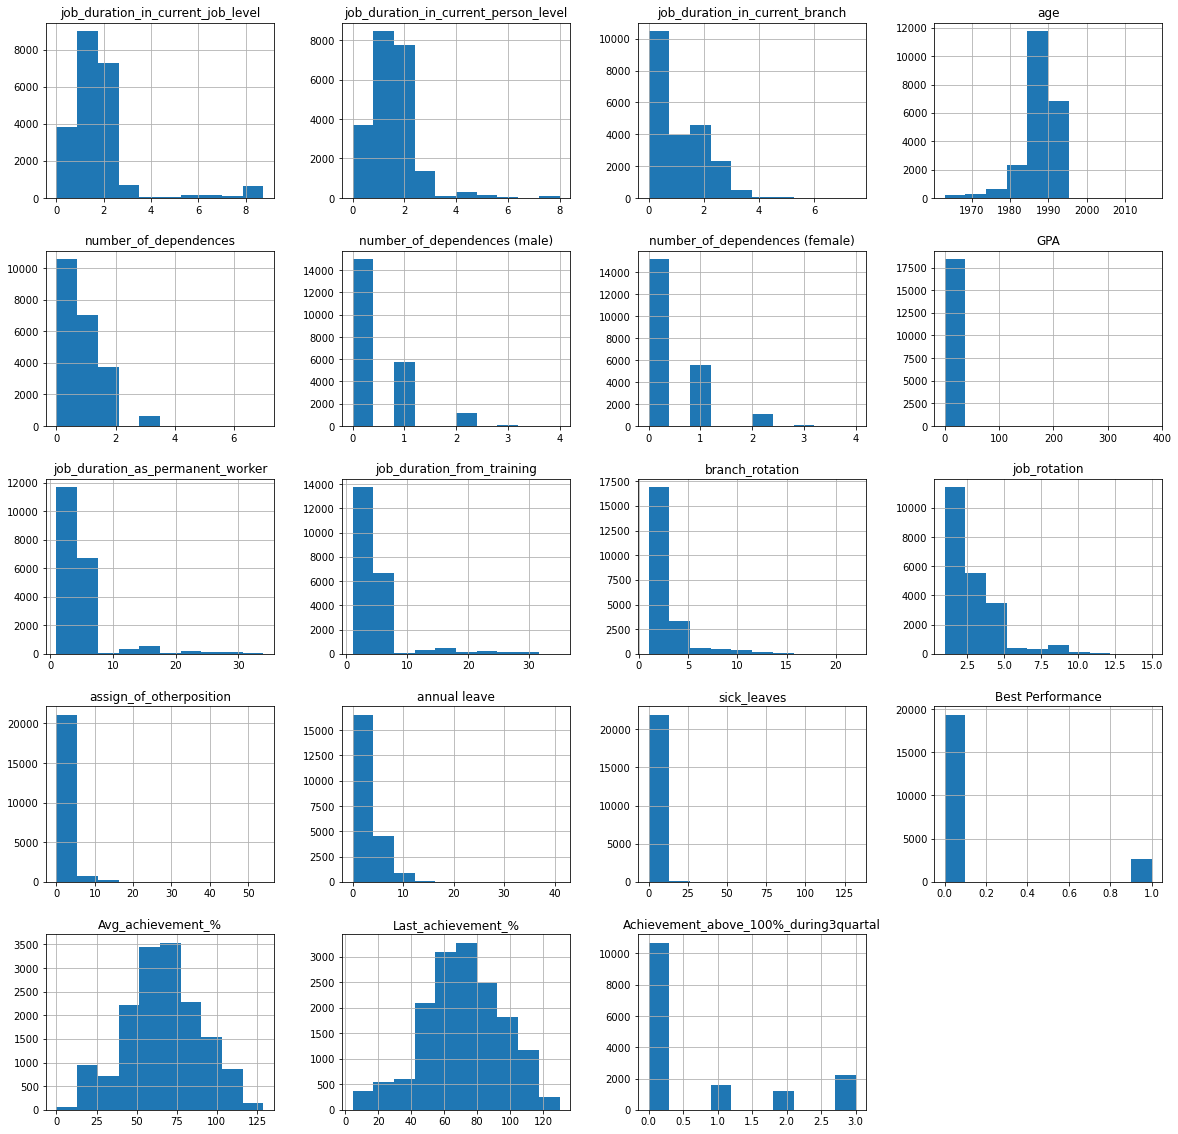

In [26]:
df_train[numeric_var].hist(figsize = (20,20))

In [31]:
numeric_discrete = ['age', 'number_of_dependences',
       'number_of_dependences (male)', 'number_of_dependences (female)', 'GPA',
       'branch_rotation', 'job_rotation', 'assign_of_otherposition',
       'annual leave', 'sick_leaves', 'Achievement_above_100%_during3quartal']

In [32]:
for i in numeric_discrete:
    print(df_train[i].value_counts(), '\n')

1989    3036
1988    2973
1990    2656
1987    2541
1991    1970
1986    1926
1985    1303
1992    1249
1984     879
1993     641
1983     563
1982     338
1981     273
1980     252
1994     250
1979     175
1978     157
1977     107
1976      86
1975      65
1995      61
1968      55
1974      54
1973      54
1970      51
1971      50
1972      48
1969      44
1965      36
1967      35
1964      27
1966      27
1996      12
1963       6
1997       3
2017       1
1998       1
Name: age, dtype: int64 

0    10592
1     7050
2     3738
3      609
4       14
7        1
5        1
Name: number_of_dependences, dtype: int64 

0    15009
1     5758
2     1130
3      105
4        3
Name: number_of_dependences (male), dtype: int64 

0    15217
1     5584
2     1125
3       76
4        3
Name: number_of_dependences (female), dtype: int64 

0.00     3853
3.00      541
3.01      353
3.10      296
3.14      294
         ... 
8.41        1
4.19        1
8.69        1
8.29        1
32.12       1
Name

> ## Age

In [34]:
df_train['age'].value_counts()

1989    3036
1988    2973
1990    2656
1987    2541
1991    1970
1986    1926
1985    1303
1992    1249
1984     879
1993     641
1983     563
1982     338
1981     273
1980     252
1994     250
1979     175
1978     157
1977     107
1976      86
1975      65
1995      61
1968      55
1974      54
1973      54
1970      51
1971      50
1972      48
1969      44
1965      36
1967      35
1964      27
1966      27
1996      12
1963       6
1997       3
2017       1
1998       1
Name: age, dtype: int64

> ## GPA

In [35]:
df_train['GPA'].value_counts()

0.00     3853
3.00      541
3.01      353
3.10      296
3.14      294
         ... 
8.41        1
4.19        1
8.69        1
8.29        1
32.12       1
Name: GPA, Length: 241, dtype: int64

In [37]:
df_train['GPA'].describe()

count    18502.000000
mean         2.994603
std         11.699025
min          0.000000
25%          2.810000
50%          3.090000
75%          3.300000
max        381.000000
Name: GPA, dtype: float64

In [53]:
np.sort(df_train[~df_train['GPA'].isnull()]['GPA'])

array([  0.,   0.,   0., ..., 362., 378., 381.])

# Data Prepaparation

## Training Set

> ## Test Set

# Feature Engineering

# Model